In [36]:
print("Shree")

Shree


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   


In [38]:
data = pd.read_csv('2011_census.csv')

In [39]:
data.head()

local authority name  All usual residents  White British  White Irish  \
0        City of London                 7375           4243          180   
1  Barking and Dagenham                 3325            496           25   
2  Barking and Dagenham                 8926           5156           79   
3  Barking and Dagenham                 5793           1961           26   
4  Barking and Dagenham                 7654           3576          137   

   White Gypsy/Irish Traveller  White Other  Mixed White and Asian  \
0                            3         1373                    111   
1                            4          494                     35   
2                            3          700                     54   
3                           10          432                     35   
4                            0          730                     31   

   Mixed White and Black African  Mixed White and Black Caribbean  \
0                             37                               38   
1                             50                               26   
2                             94                               86   
3                             91                               96   
4                             98                              107   

   Mixed Other  Asian Bangladeshi  Asian Chinese  Asian Indian  \
0          103                232            263           216   
1           35                144            104           701   
2           62                273             71           173   
3           82                298             45           157   
4           60                187             43           247   

   Asian Pakistani  Asian Other  Black African  Black Caribbean  Black Other  \
0               16          213             98               46           49   
1              315          161            503               81           40   
2              104          230           1455              206           94   
3              167          183           1684              236          174   
4               93          123           1598              271          191   

   Other Arab  Other Any other  
0          69               85  
1          23               89  
2          31               55  
3          30               88  
4          22              139

In [40]:
data.columns[0]

'local authority name'

In [41]:
grouped_data = data.groupby(data.columns[0]).sum()
grouped_data_copy = grouped_data.copy()
grouped_data.head()
grouped_data.to_csv('test.csv')

In [42]:
grouped_data.columns

Index(['All usual residents', 'White British', 'White Irish',
       'White Gypsy/Irish Traveller', 'White Other', 'Mixed White and Asian',
       'Mixed White and Black African', 'Mixed White and Black Caribbean',
       'Mixed Other', 'Asian Bangladeshi', 'Asian Chinese', 'Asian Indian',
       'Asian Pakistani', 'Asian Other', 'Black African', 'Black Caribbean',
       'Black Other', 'Other Arab', 'Other Any other'],
      dtype='object')

In [43]:
grouped_data.shape

(33, 19)

In [44]:
grouped_data['Others'] = grouped_data['White Other'] + grouped_data['Asian Other'] + grouped_data['Black Other'] + grouped_data['Mixed Other'] + grouped_data['Other Any other'] + grouped_data['Other Arab']

In [45]:
grouped_data = grouped_data.drop(columns=['All usual residents','Black Other', 'White Other', 'Mixed Other', 'Asian Other','Other Any other', 'Other Arab' ])


In [46]:
grouped_data.head()

White British  White Irish  White Gypsy/Irish Traveller  \
local authority name                                                            
Barking and Dagenham          91951         1729                          182   
Barnet                       162116         8685                          152   
Bexley                       179250         2596                          623   
Brent                         55887        12323                          320   
Bromley                      239480         4464                          579   

                      Mixed White and Asian  Mixed White and Black African  \
local authority name                                                         
Barking and Dagenham                   1245                           2127   
Barnet                                 5883                           3111   
Bexley                                 1369                            984   
Brent                                  3643                           2821   
Bromley                                3016                           1338   

                      Mixed White and Black Caribbean  Asian Bangladeshi  \
local authority name                                                       
Barking and Dagenham                             2668               7701   
Barnet                                           3099               2218   
Bexley                                           1676                777   
Brent                                            4294               1749   
Bromley                                          3896               1265   

                      Asian Chinese  Asian Indian  Asian Pakistani  \
local authority name                                                 
Barking and Dagenham           1315          7437             8007   
Barnet                         8260         27919             5344   
Bexley                         2512          7049              733   
Brent                          3252         58018            14381   
Bromley                        2768          6216             1013   

                      Black African  Black Caribbean  Others  
local authority name                                          
Barking and Dagenham          28685             5228   27636  
Barnet                        19390             4470  105744  
Bexley                        15951             2380   16099  
Brent                         24391            23723  106423  
Bromley                        9819             6608   28931

In [47]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)


In [48]:
grouped_data['Total_Population'] = grouped_data.sum(axis=1)
ethnic_columns = grouped_data.columns[:-1]  # All columns except 'Total Population'
data_percentage = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0) * 100

In [49]:
ethnic_columns

Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean',
       'Others'],
      dtype='object')

In [50]:
data_percentage

White British  White Irish  \
local authority name                                 
Barking and Dagenham        24.729844     0.465007   
Barnet                      22.744121     1.218465   
Bexley                      38.631632     0.559485   
Brent                        8.978552     1.979757   
Bromley                     38.701587     0.721413   
Camden                      21.997086     1.600510   
City of London              28.766102     1.220339   
Croydon                     23.630830     0.738902   
Ealing                      15.221271     1.540534   
Enfield                     20.234300     1.104134   
Greenwich                   26.149546     0.842837   
Hackney                     18.075542     1.059195   
Hammersmith and Fulham      22.463014     1.732055   
Haringey                    17.342944     1.371972   
Harrow                      15.441555     1.534388   
Havering                    41.651210     0.630201   
Hillingdon                  26.085949     1.085675   
Hounslow                    18.952218     0.940681   
Islington                   23.851375     1.974374   
Kensington and Chelsea      19.624961     1.170816   
Kingston upon Thames        31.552594     0.849295   
Lambeth                     19.507914     1.230215   
Lewisham                    20.741463     0.943502   
Merton                      24.201552     1.105909   
Newham                       8.363205     0.352613   
Redbridge                   17.251620     0.699005   
Richmond upon Thames        35.718831     1.274393   
Southwark                   19.864924     1.079499   
Sutton                      35.459824     0.846441   
Tower Hamlets               15.590748     0.760155   
Waltham Forest              18.005142     0.766687   
Wandsworth                  26.667329     1.248359   
Westminster                 17.623814     1.131029   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                       0.048948               0.334838   
Barnet                                     0.021325               0.825358   
Bexley                                     0.134268               0.295044   
Brent                                      0.051410               0.585268   
Bromley                                    0.093570               0.487406   
Camden                                     0.037897               0.880927   
City of London                             0.020339               0.752542   
Croydon                                    0.032060               0.707254   
Ealing                                     0.044319               0.687390   
Enfield                                    0.054727               0.670482   
Greenwich                                  0.084460               0.463943   
Hackney                                    0.096641               0.612940   
Hammersmith and Fulham                     0.059452               0.726027   
Haringey                                   0.072374               0.733549   
Harrow                                     0.037858               0.714904   
Havering                                   0.033723               0.243228   
Hillingdon                                 0.062790               0.657282   
Hounslow                                   0.036029               0.667218   
Islington                                  0.039541               0.719013   
Kensington and Chelsea                     0.037504               0.952096   
Kingston upon Thames                       0.029986               0.781201   
Lambeth                                    0.032170               0.589454   
Lewisham                                   0.037697               0.552038   
Merton                                     0.054331               0.708563   
Newham                                     0.075003               0.434922   
Redbridge                  

In [51]:
#data_percentage = data_percentage.drop(columns=['Total_Population'])
ethnic_columns = ethnic_columns[:-1]

In [52]:
ethnic_columns

Index(['White British', 'White Irish', 'White Gypsy/Irish Traveller',
       'Mixed White and Asian', 'Mixed White and Black African',
       'Mixed White and Black Caribbean', 'Asian Bangladeshi', 'Asian Chinese',
       'Asian Indian', 'Asian Pakistani', 'Black African', 'Black Caribbean'],
      dtype='object')

#### Distribution and Visualization

<Figure size 1400x800 with 0 Axes>

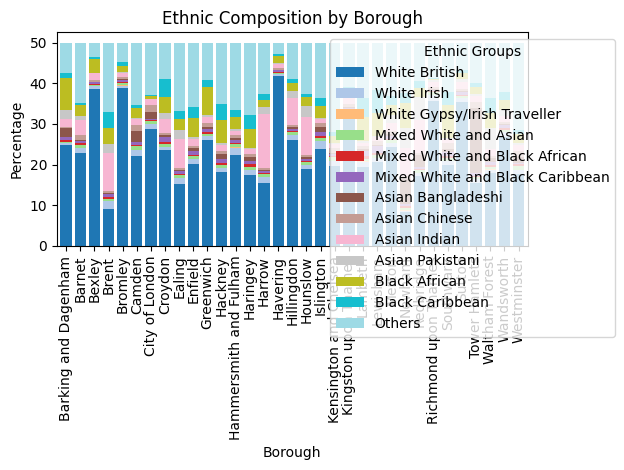

In [53]:
plt.figure(figsize=(14, 8))
data_percentage.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title("Ethnic Composition by Borough")
plt.xlabel("Borough")
plt.ylabel("Percentage")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Ethnic Groups")
plt.tight_layout()
plt.show()

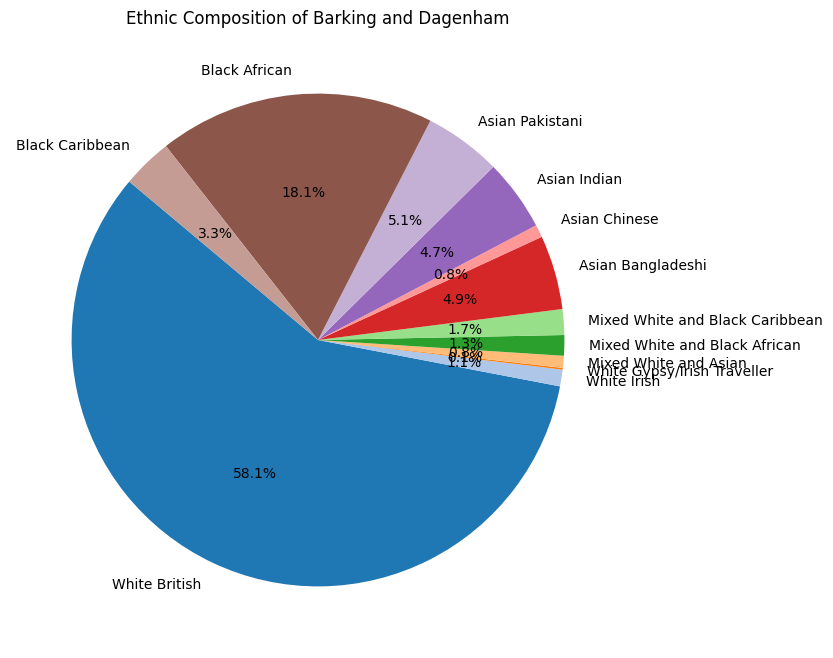

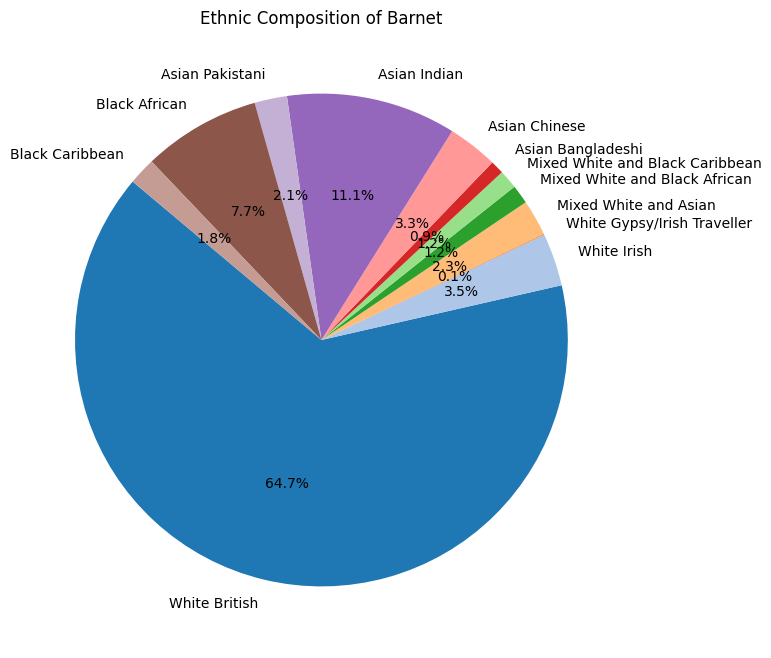

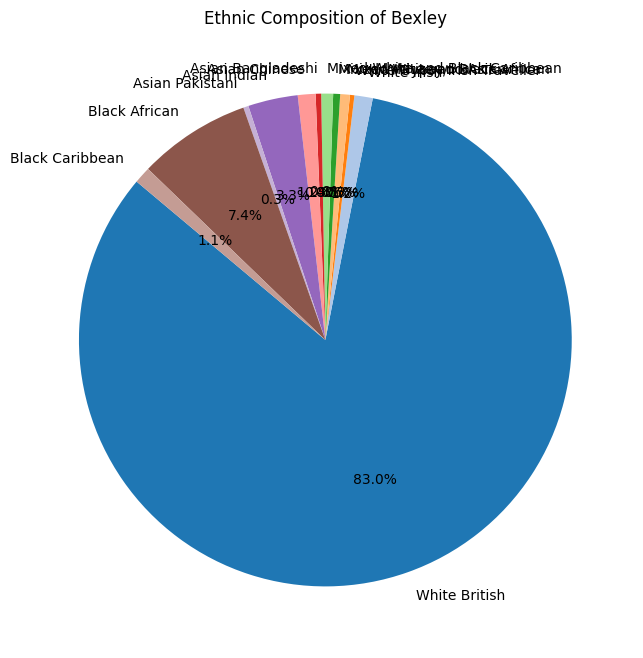

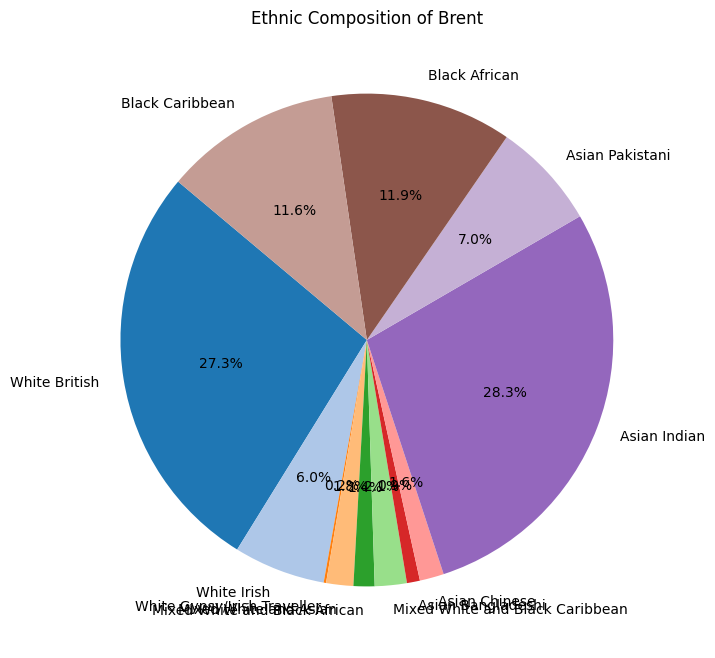

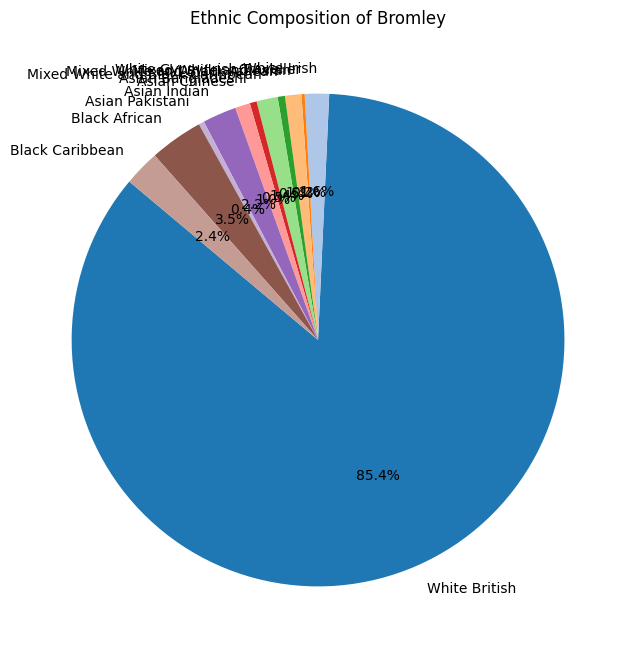

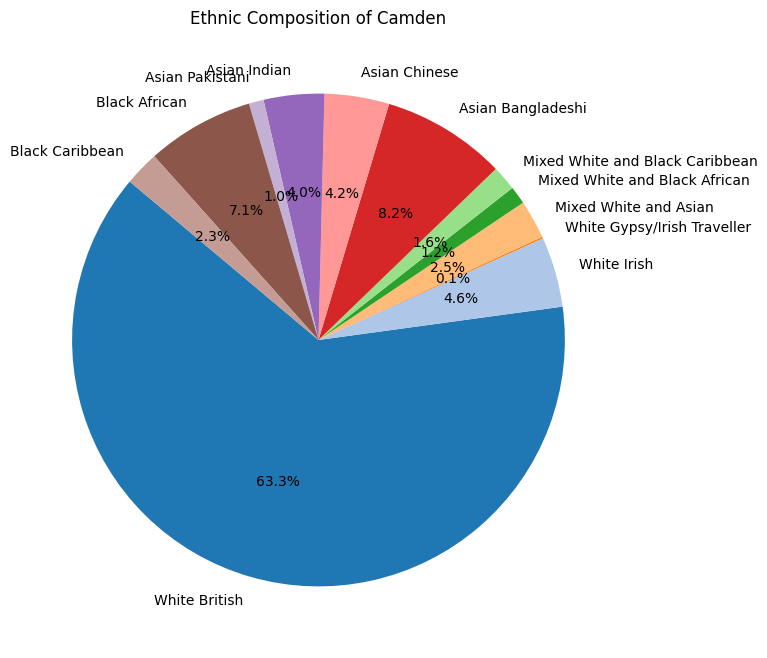

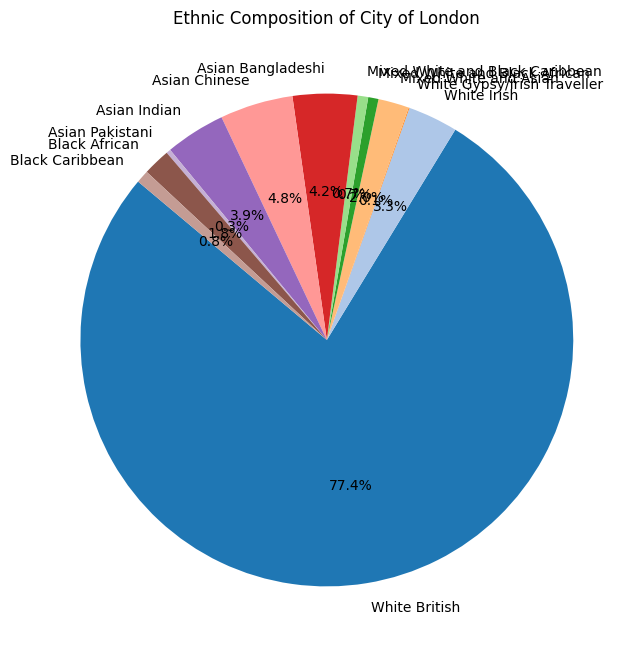

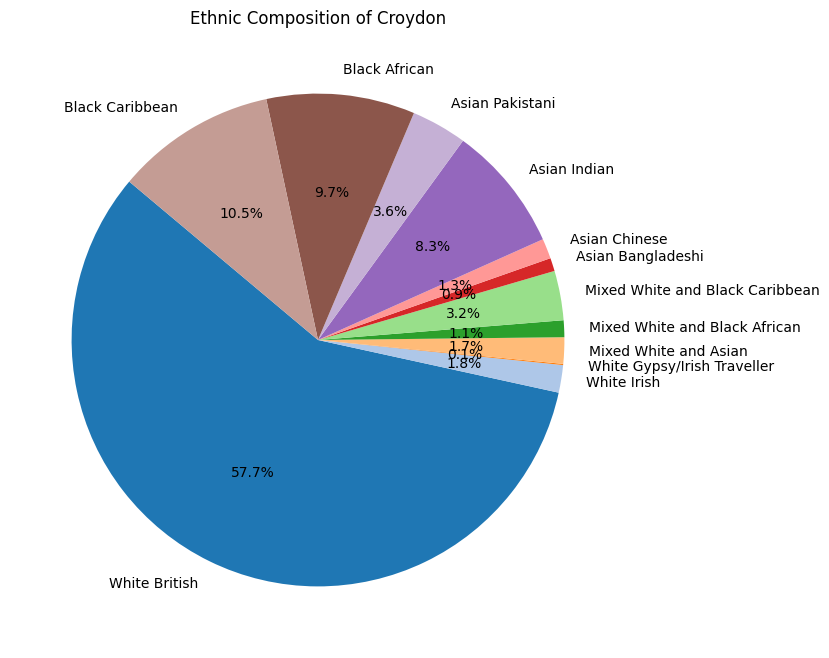

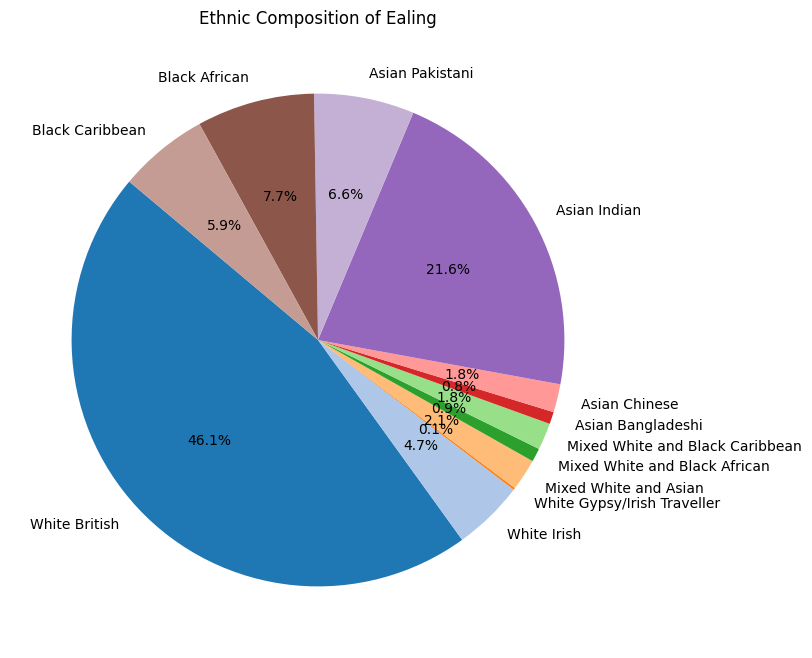

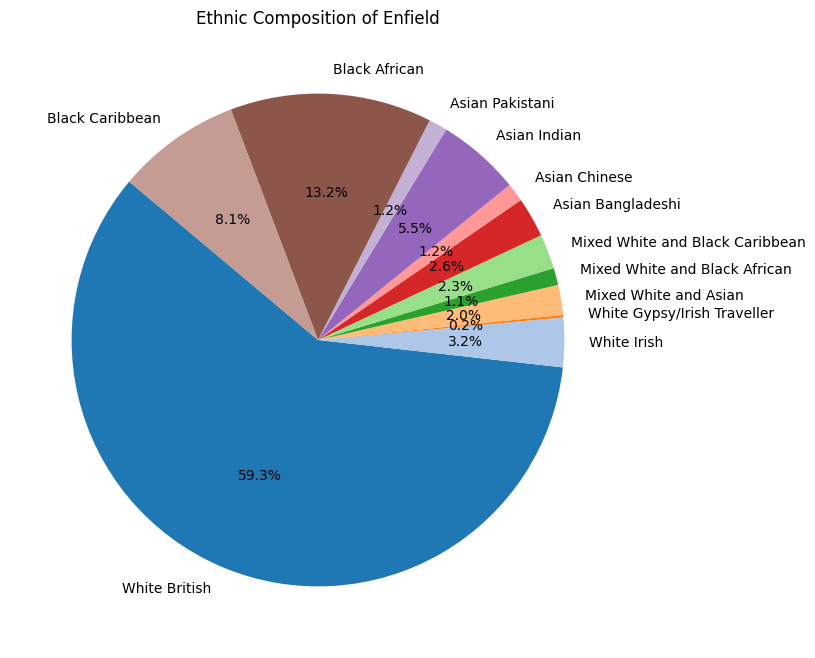

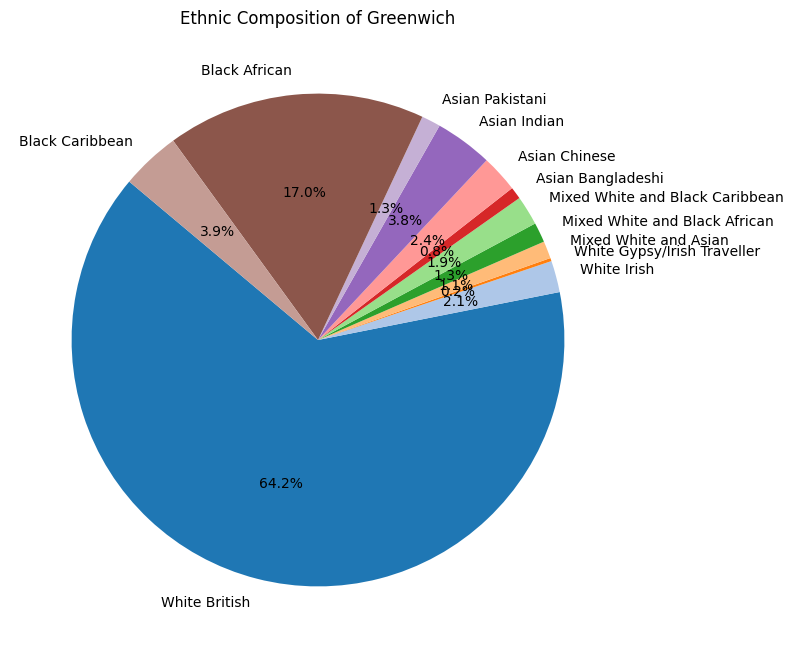

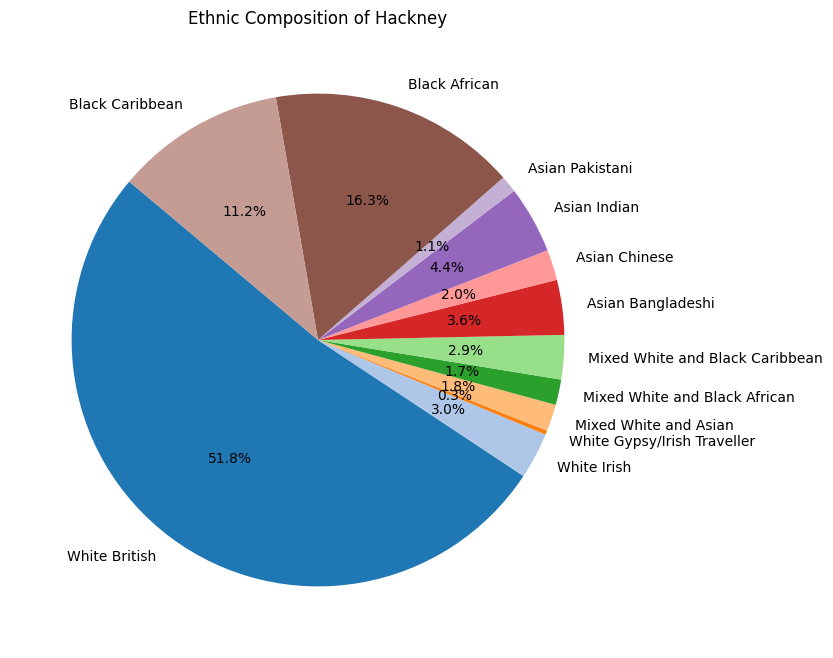

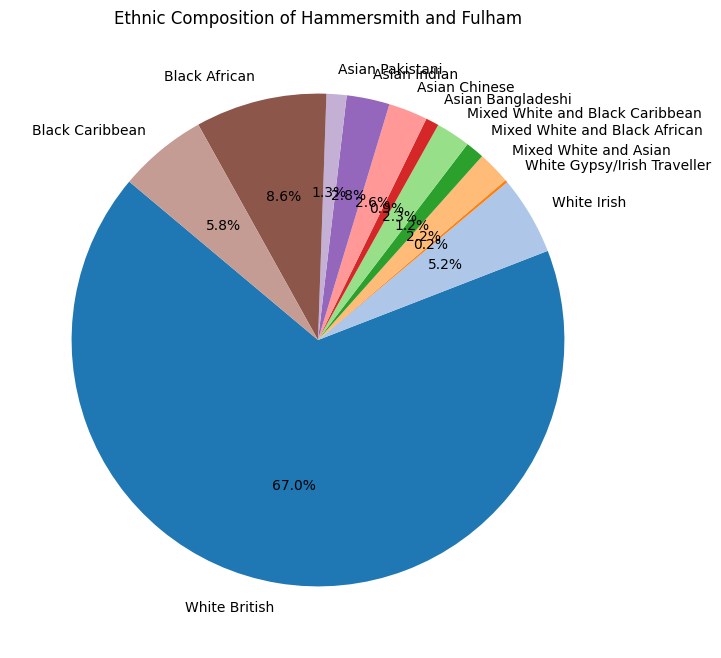

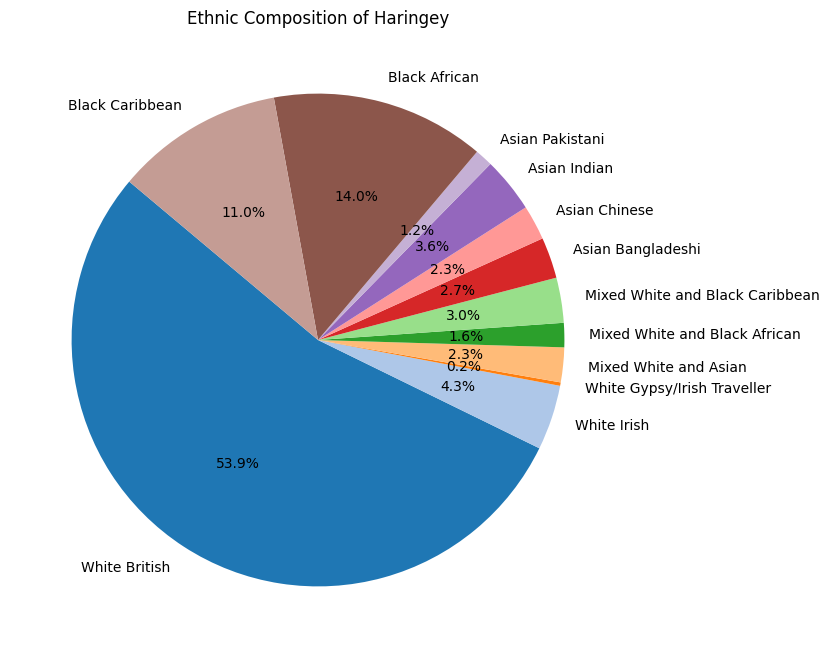

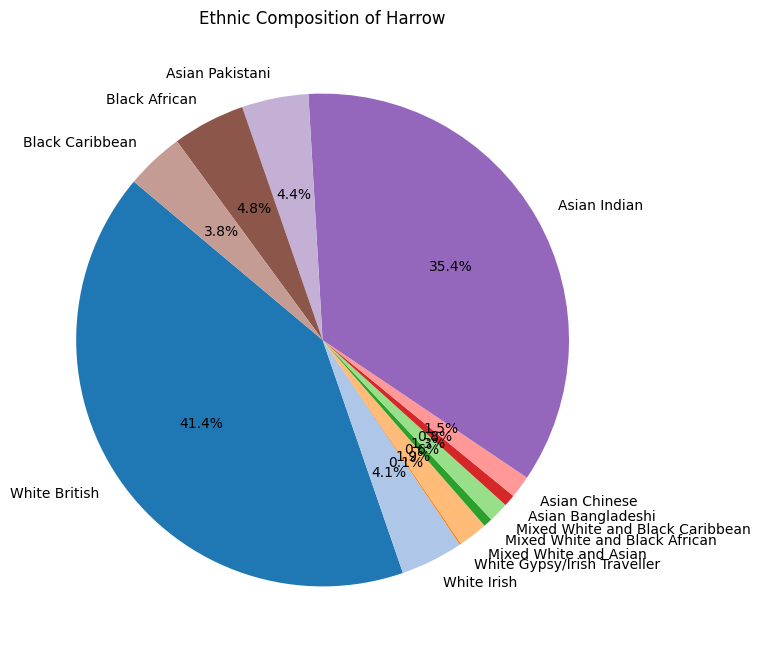

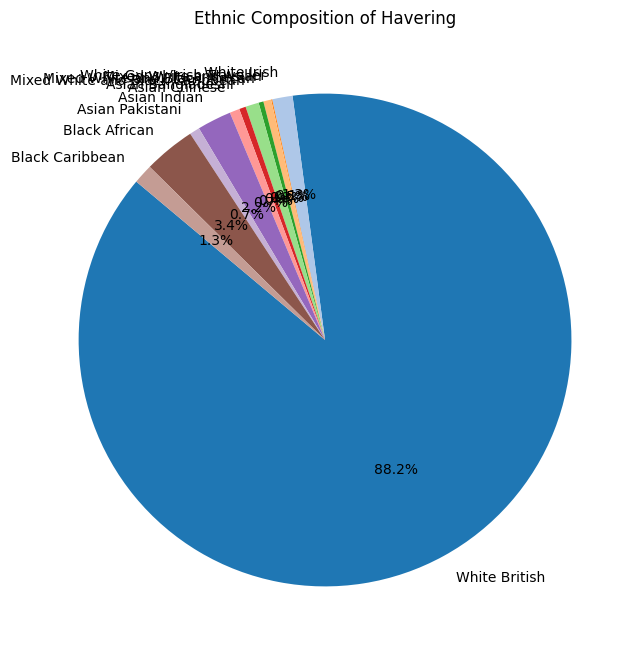

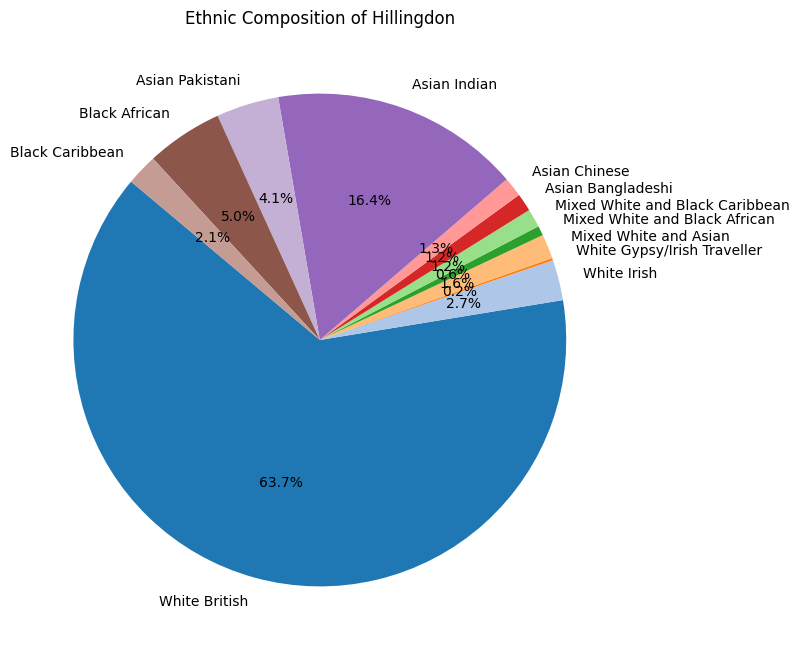

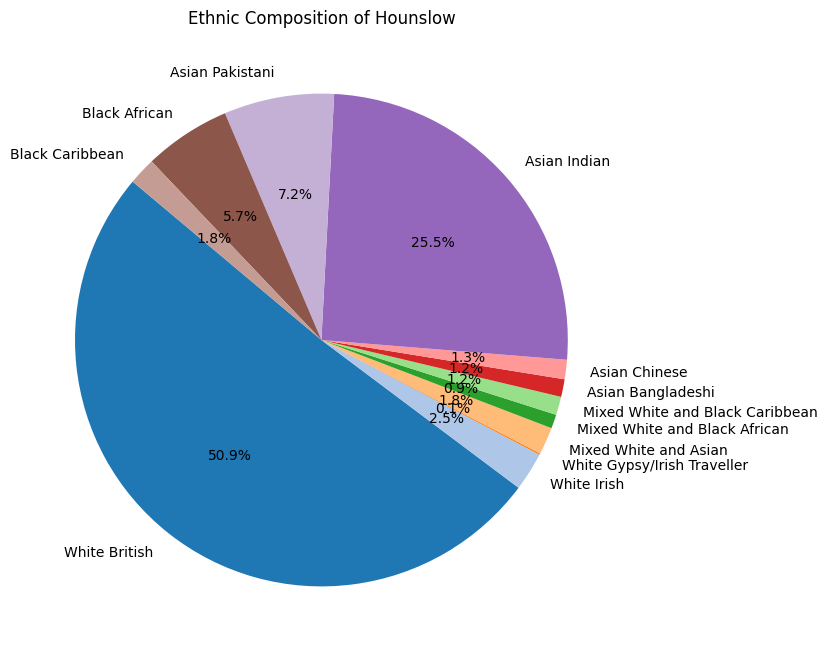

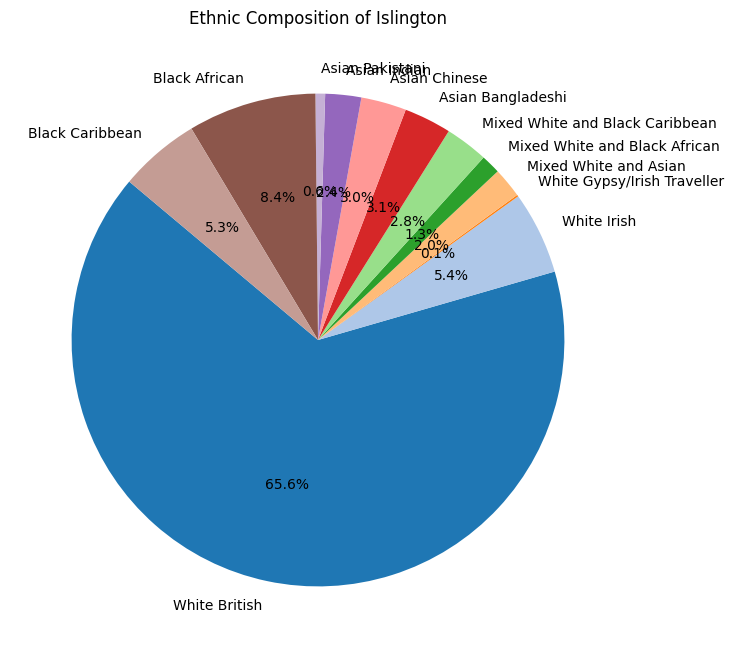

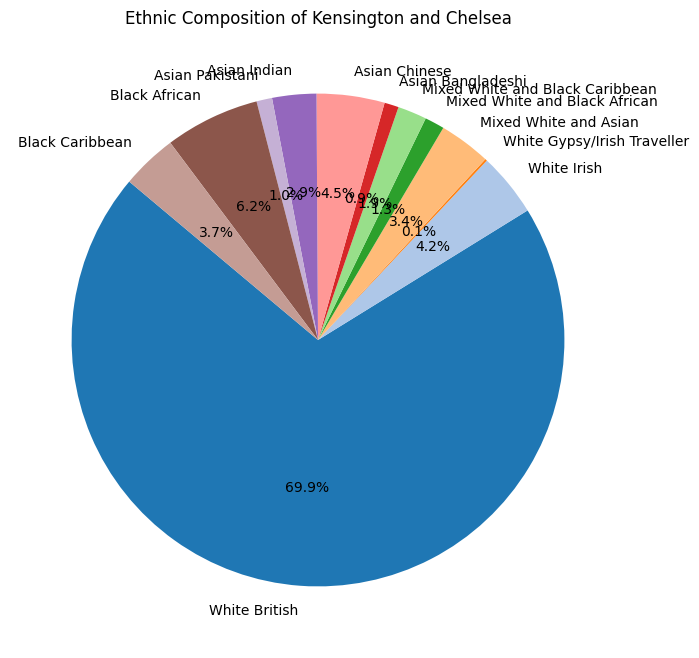

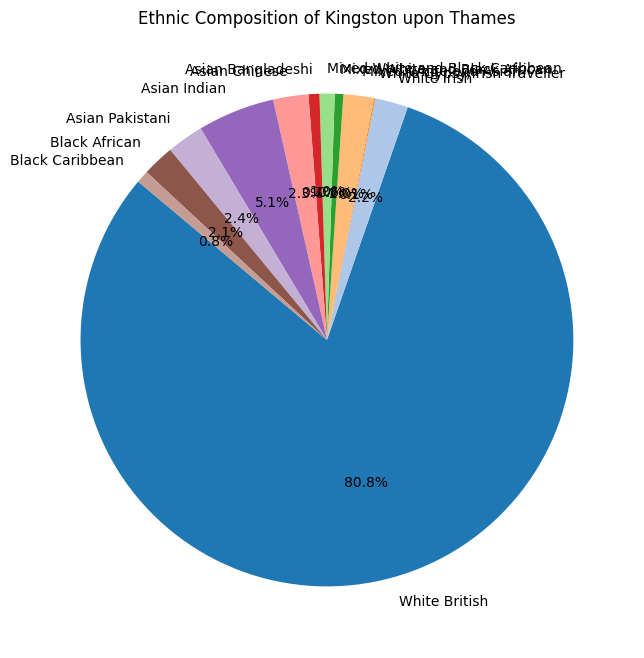

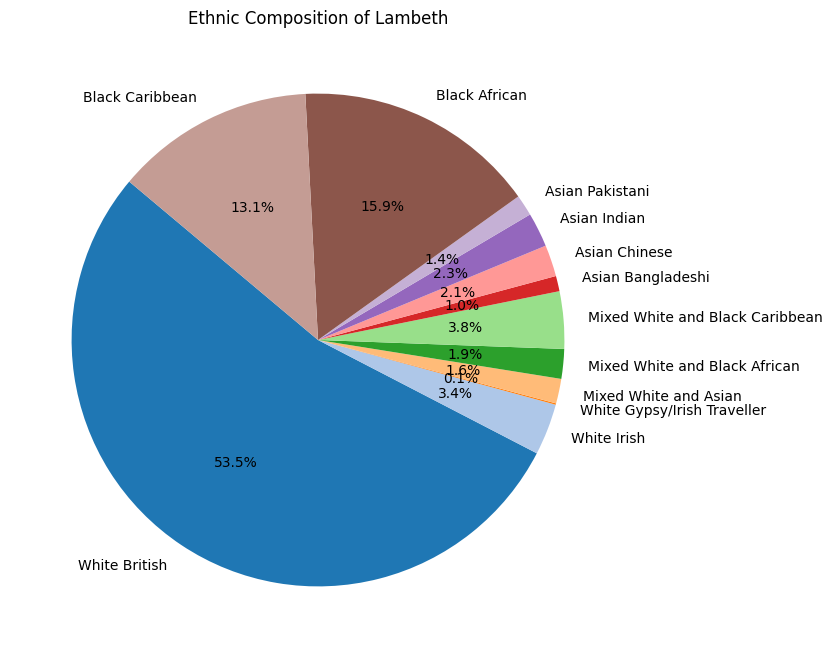

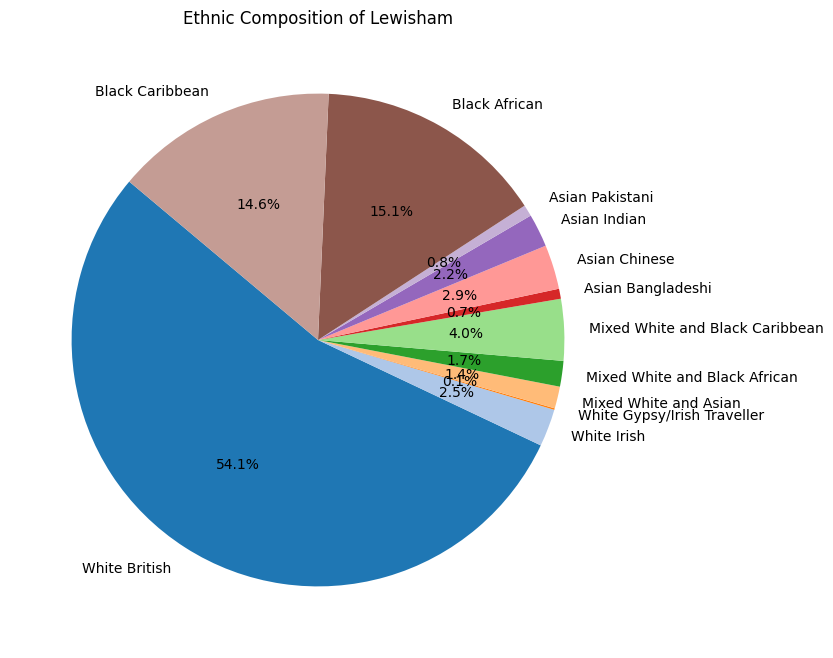

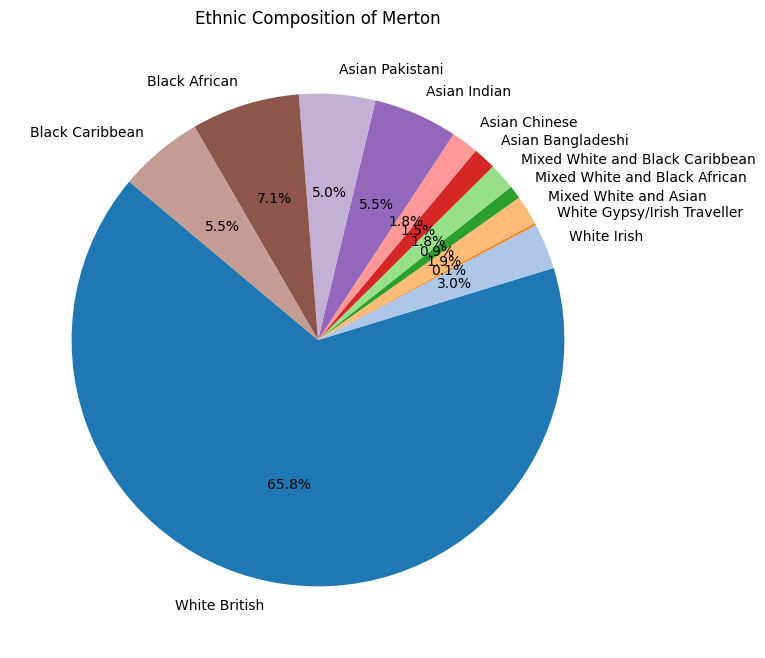

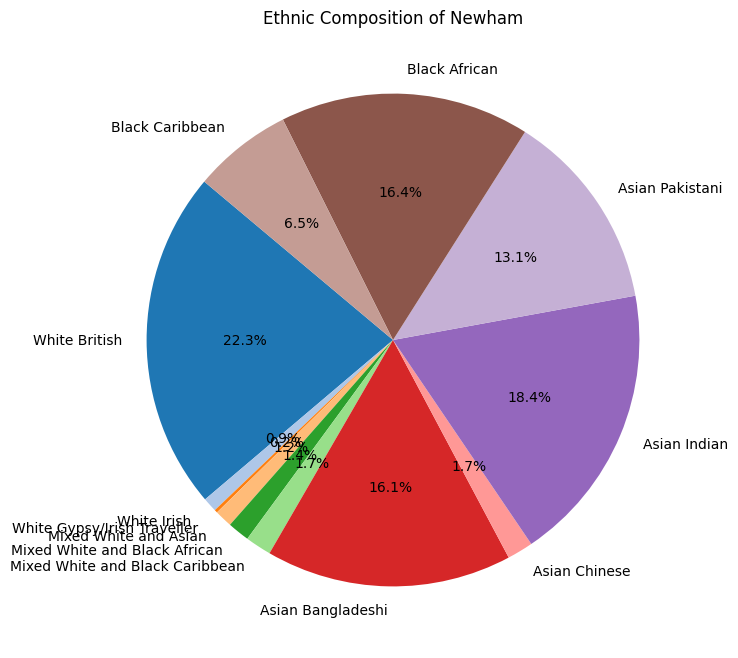

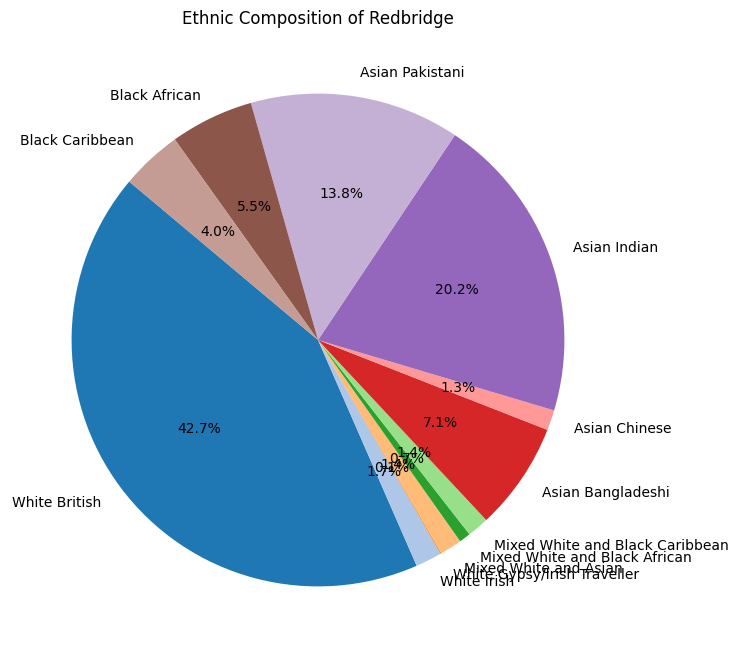

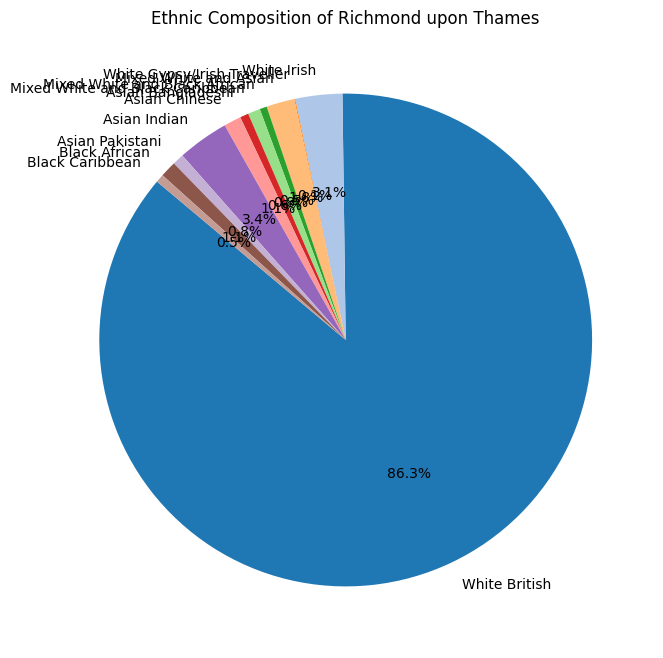

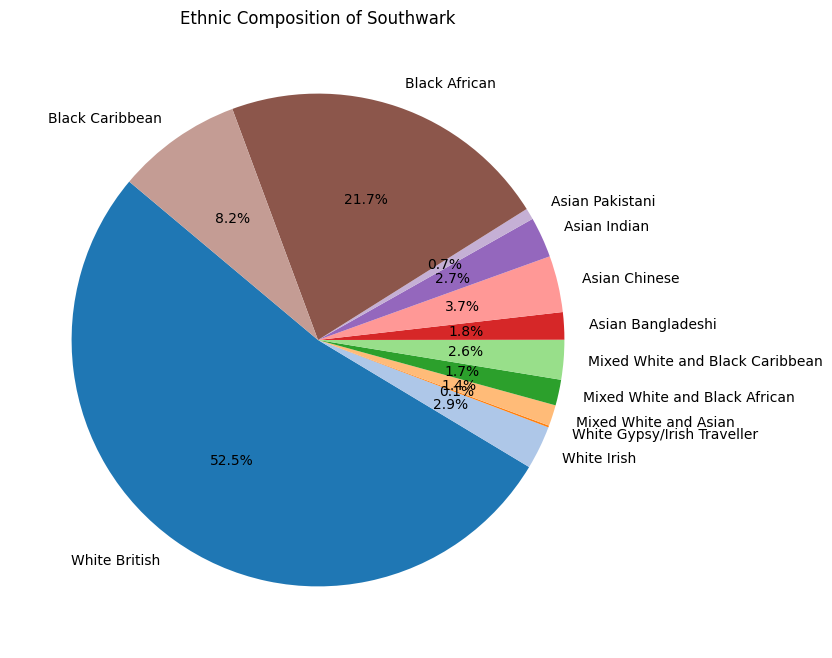

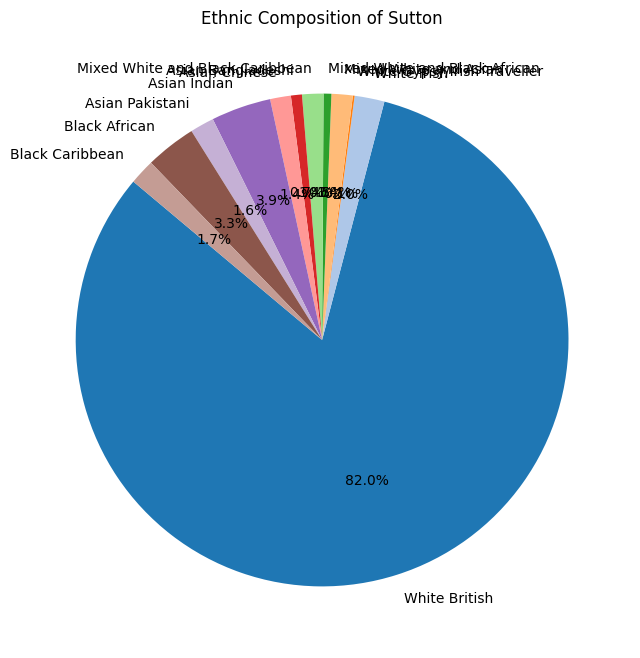

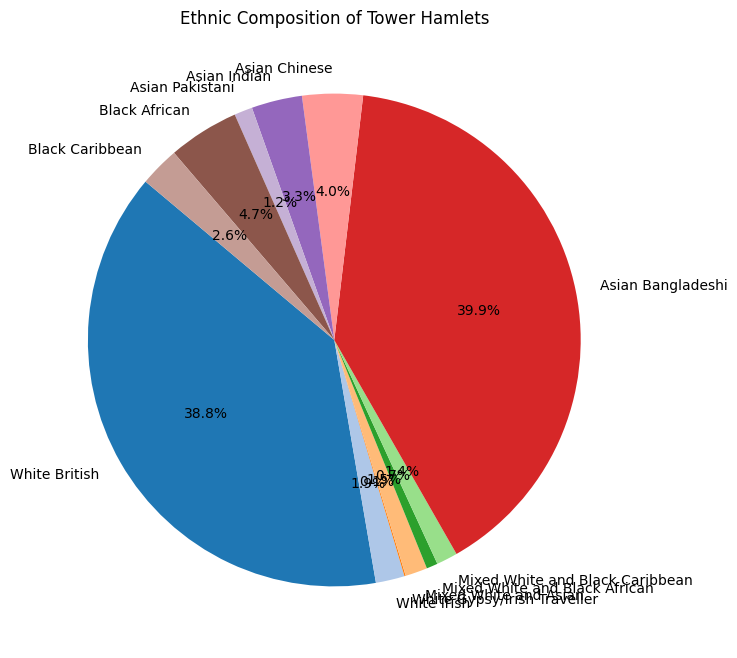

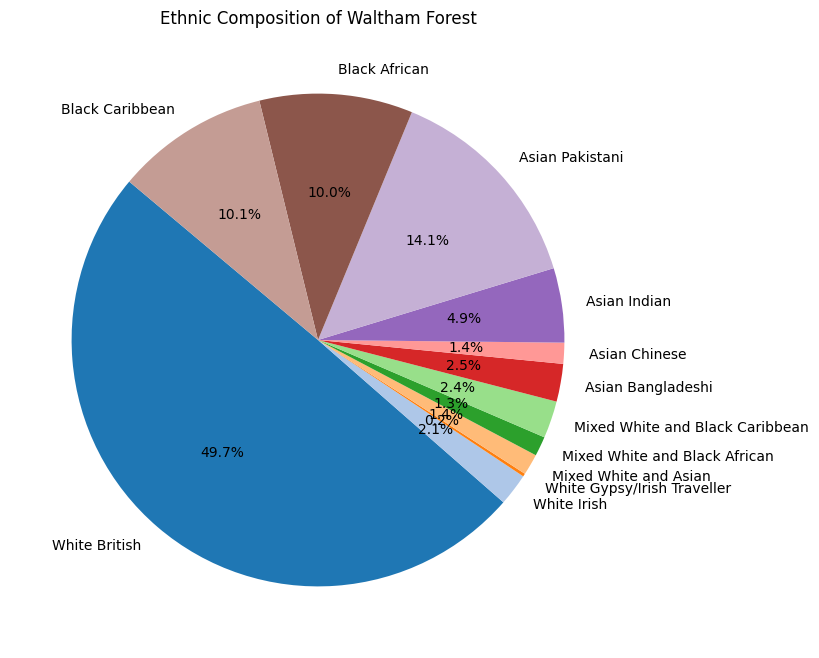

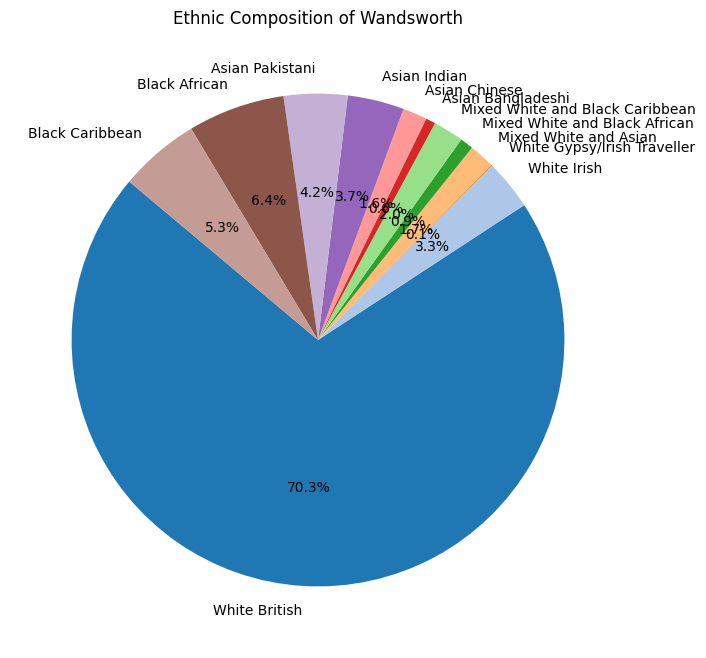

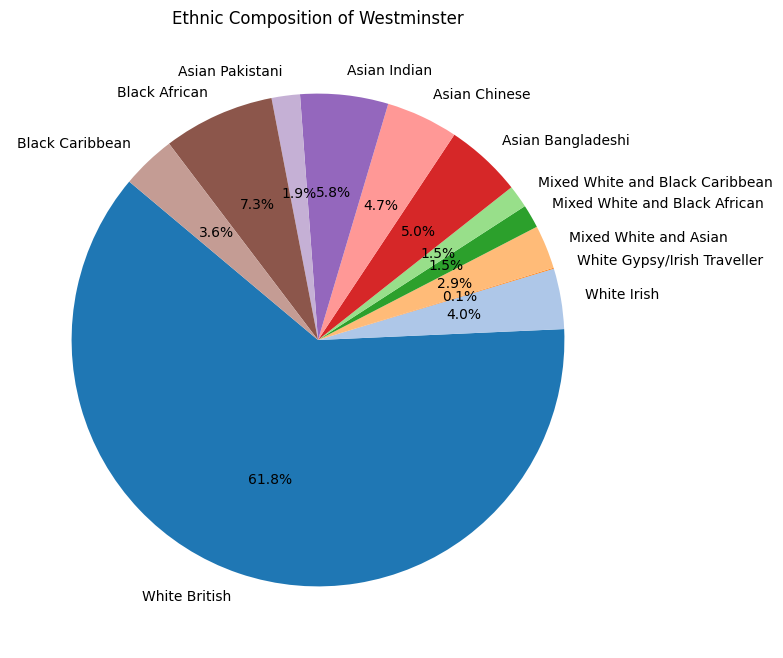

In [54]:

for borough in grouped_data.index.to_list() :

    borough_data = grouped_data.loc[borough, ethnic_columns]

    plt.figure(figsize=(8, 8))
    plt.pie(borough_data, labels=ethnic_columns, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", len(ethnic_columns)))
    plt.title(f"Ethnic Composition of {borough}")
    plt.show()

In [55]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham            91951         1729   
Barnet                         162116         8685   
Bexley                         179250         2596   
Brent                           55887        12323   
Bromley                        239480         4464   
Camden                          96935         7053   
City of London                   4243          180   
Croydon                        171738         5370   
Ealing                         103034        10428   
Enfield                        126449         6900   
Greenwich                      133131         4291   
Hackney                         89030         5217   
Hammersmith and Fulham          81990         6322   
Haringey                        88423         6995   
Harrow                          73827         7336   
Havering                       197615         2990   
Hillingdon                     142915         5948   
Hounslow                        96264         4778   
Islington                       98323         8139   
Kensington and Chelsea          62270         3715   
Kingston upon Thames           101015         2719   
Lambeth                        118248         7457   
Lewisham                       114446         5206   
Merton                          96661         4417   
Newham                          51515         2172   
Redbridge                       96253         3900   
Richmond upon Thames           133582         4766   
Southwark                      114534         6224   
Sutton                         134853         3219   
Tower Hamlets                   79230         3863   
Waltham Forest                  92998         3960   
Wandsworth                     163739         7665   
Westminster                     77334         4963   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            182                   1245   
Barnet                                          152                   5883   
Bexley                                          623                   1369   
Brent                                           320                   3643   
Bromley                                         579                   3016   
Camden                                          167                   3882   
City of London                                    3                    111   
Croydon                                         233                   5140   
Ealing                                          300                   4653   
Enfield                                         342                   4190   
Greenwich                                       430                   2362   
Hackney                                         476                   3019   
Hammersmith and Fulham                          217                   2650   
Haringey                                        369                   3740   
Harrow                                          181                   3418   
Havering                                        160                   1154   
Hillingdon                                      344                   3601   
Hounslow                                        183                   3389   
Islington                                       163                   2964   
Kensington and Chelsea                          119                   3021   
Kingston upon Thames                             96                   2501   
Lambeth                                         195                   3573   
Lewisham                                        208                   3046   
Merton                                          217                   2830   
Newham                                          462                   2679   
Redbridge                  

#### Ethnic Race wise distribution 

<Figure size 1000x1000 with 0 Axes>

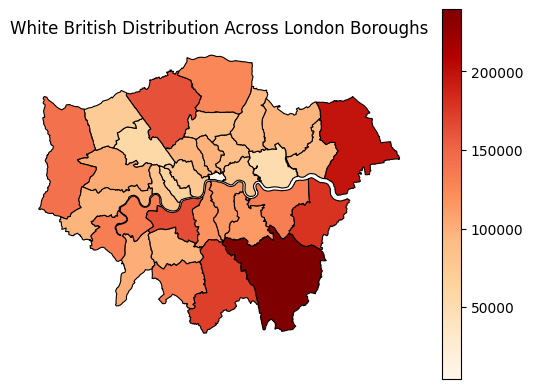

<Figure size 1000x1000 with 0 Axes>

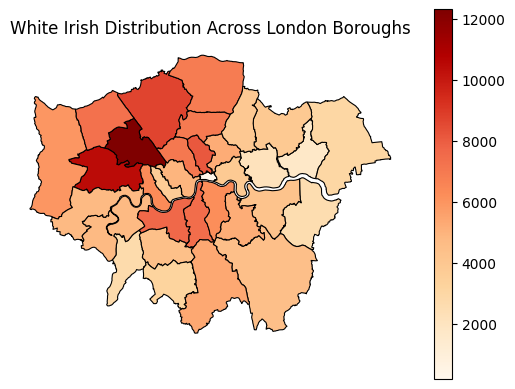

<Figure size 1000x1000 with 0 Axes>

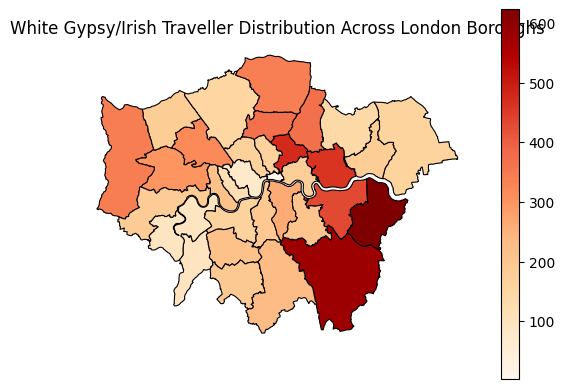

<Figure size 1000x1000 with 0 Axes>

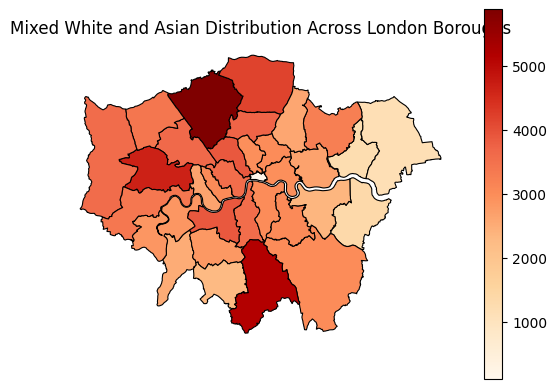

<Figure size 1000x1000 with 0 Axes>

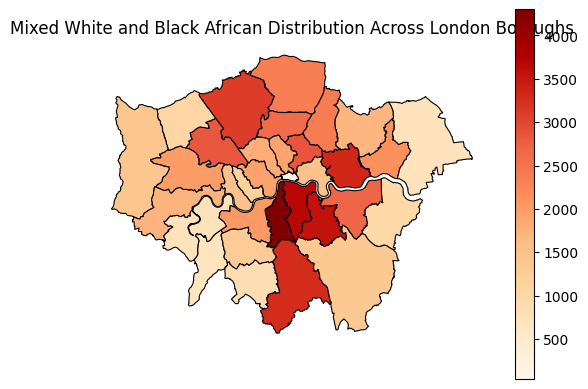

<Figure size 1000x1000 with 0 Axes>

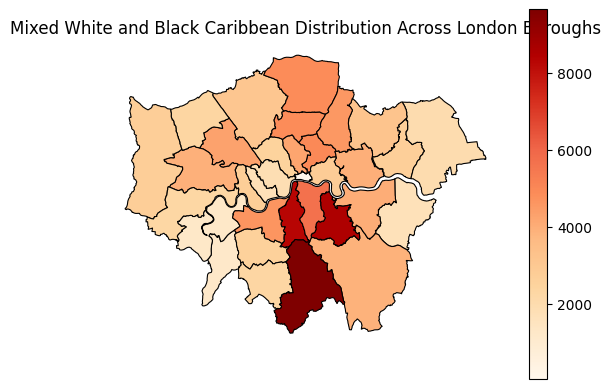

<Figure size 1000x1000 with 0 Axes>

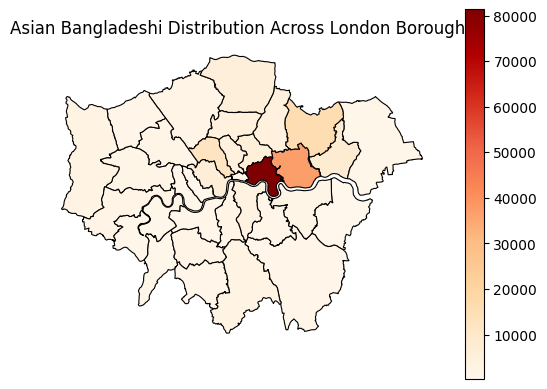

<Figure size 1000x1000 with 0 Axes>

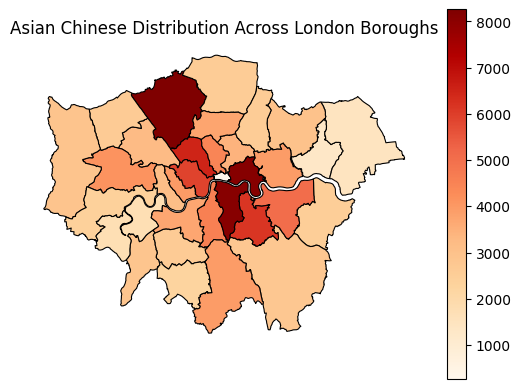

<Figure size 1000x1000 with 0 Axes>

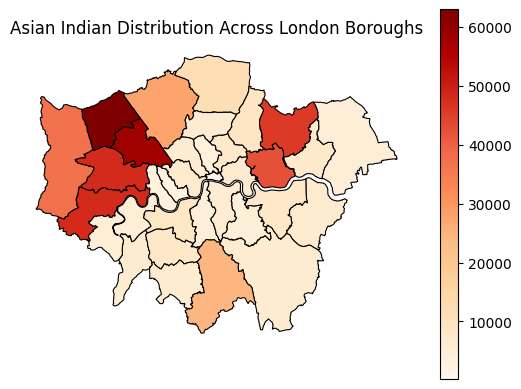

<Figure size 1000x1000 with 0 Axes>

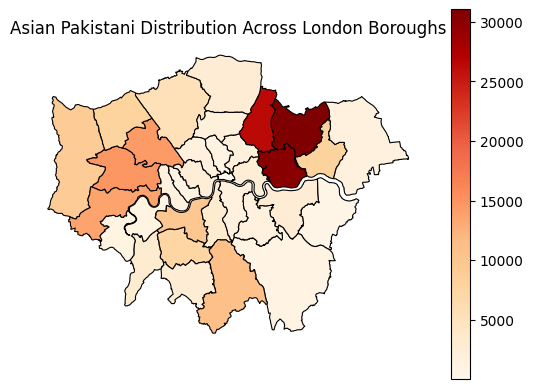

<Figure size 1000x1000 with 0 Axes>

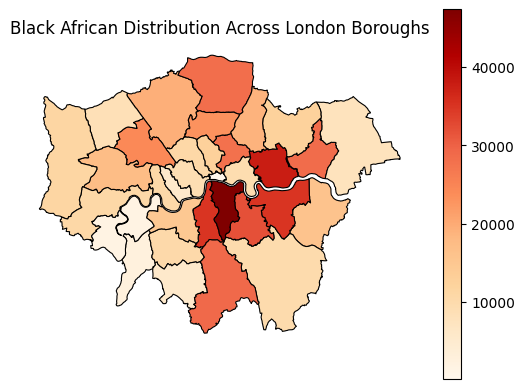

<Figure size 1000x1000 with 0 Axes>

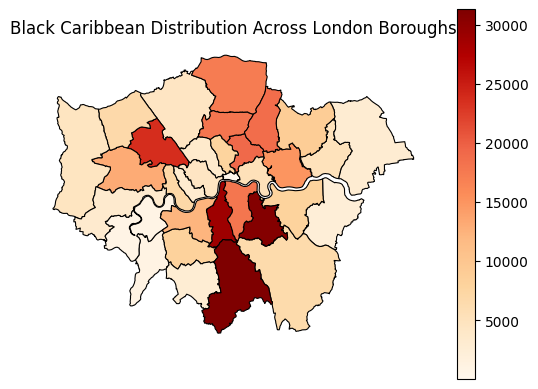

<Figure size 1000x1000 with 0 Axes>

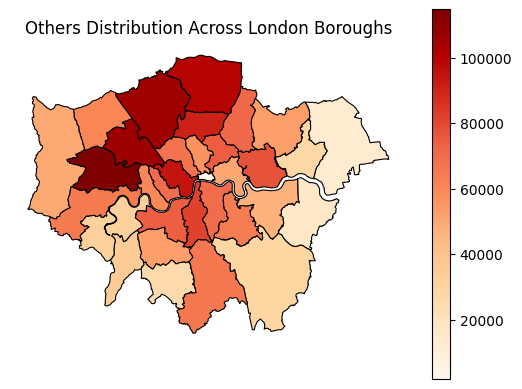

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame

# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')

# Ensure the 'local authority name' column in your data matches the borough names in the geo_df
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Update with actual column name
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')

# Plot the choropleth for each ethnic group
ethnic_columns = grouped_data.columns[:-1]  # All ethnic columns, excluding 'Total Population'

# 1. Plotting a map for each ethnic group distribution
for column in ethnic_columns:
    plt.figure(figsize=(10, 10))
    merged_data.plot(column=column, cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True)
    plt.title(f"{column} Distribution Across London Boroughs")
    plt.axis('off')
    plt.show()


In [68]:
grouped_data

White British  White Irish  \
local authority name                                 
Barking and Dagenham            91951         1729   
Barnet                         162116         8685   
Bexley                         179250         2596   
Brent                           55887        12323   
Bromley                        239480         4464   
Camden                          96935         7053   
City of London                   4243          180   
Croydon                        171738         5370   
Ealing                         103034        10428   
Enfield                        126449         6900   
Greenwich                      133131         4291   
Hackney                         89030         5217   
Hammersmith and Fulham          81990         6322   
Haringey                        88423         6995   
Harrow                          73827         7336   
Havering                       197615         2990   
Hillingdon                     142915         5948   
Hounslow                        96264         4778   
Islington                       98323         8139   
Kensington and Chelsea          62270         3715   
Kingston upon Thames           101015         2719   
Lambeth                        118248         7457   
Lewisham                       114446         5206   
Merton                          96661         4417   
Newham                          51515         2172   
Redbridge                       96253         3900   
Richmond upon Thames           133582         4766   
Southwark                      114534         6224   
Sutton                         134853         3219   
Tower Hamlets                   79230         3863   
Waltham Forest                  92998         3960   
Wandsworth                     163739         7665   
Westminster                     77334         4963   

                        White Gypsy/Irish Traveller  Mixed White and Asian  \
local authority name                                                         
Barking and Dagenham                            182                   1245   
Barnet                                          152                   5883   
Bexley                                          623                   1369   
Brent                                           320                   3643   
Bromley                                         579                   3016   
Camden                                          167                   3882   
City of London                                    3                    111   
Croydon                                         233                   5140   
Ealing                                          300                   4653   
Enfield                                         342                   4190   
Greenwich                                       430                   2362   
Hackney                                         476                   3019   
Hammersmith and Fulham                          217                   2650   
Haringey                                        369                   3740   
Harrow                                          181                   3418   
Havering                                        160                   1154   
Hillingdon                                      344                   3601   
Hounslow                                        183                   3389   
Islington                                       163                   2964   
Kensington and Chelsea                          119                   3021   
Kingston upon Thames                             96                   2501   
Lambeth                                         195                   3573   
Lewisham                                        208                   3046   
Merton                                          217                   2830   
Newham                                          462                   2679   
Redbridge                  

In [74]:
merged_data

local authority name  cartodb_id                created_at  \
0     Barking and Dagenham           1 2013-09-16 02:14:14+02:00   
1                   Barnet           2 2013-09-16 02:14:14+02:00   
2                   Bexley           3 2013-09-16 02:14:14+02:00   
3                    Brent           4 2013-09-16 02:14:14+02:00   
4                  Bromley           5 2013-09-16 02:14:14+02:00   
5                   Camden           6 2013-09-16 02:14:14+02:00   
6           City of London           7 2013-09-16 02:14:14+02:00   
7                   Ealing           8 2013-09-16 02:14:14+02:00   
8                  Enfield           9 2013-09-16 02:14:14+02:00   
9                Greenwich          10 2013-09-16 02:14:14+02:00   
10                 Hackney          11 2013-09-16 02:14:14+02:00   
11  Hammersmith and Fulham          12 2013-09-16 02:14:14+02:00   
12                Haringey          13 2013-09-16 02:14:14+02:00   
13                  Harrow          14 2013-09-16 02:14:14+02:00   
14                Havering          15 2013-09-16 02:14:14+02:00   
15              Hillingdon          16 2013-09-16 02:14:14+02:00   
16                Hounslow          17 2013-09-16 02:14:14+02:00   
17               Islington          18 2013-09-16 02:14:14+02:00   
18  Kensington and Chelsea          19 2013-09-16 02:14:14+02:00   
19    Kingston upon Thames          20 2013-09-16 02:14:14+02:00   
20                 Lambeth          21 2013-09-16 02:14:14+02:00   
21                Lewisham          22 2013-09-16 02:14:14+02:00   
22                  Merton          23 2013-09-16 02:14:14+02:00   
23                  Newham          24 2013-09-16 02:14:14+02:00   
24               Redbridge          25 2013-09-16 02:14:14+02:00   
25    Richmond upon Thames          26 2013-09-16 02:14:14+02:00   
26               Southwark          27 2013-09-16 02:14:14+02:00   
27                  Sutton          28 2013-09-16 02:14:14+02:00   
28           Tower Hamlets          29 2013-09-16 02:14:14+02:00   
29          Waltham Forest          30 2013-09-16 02:14:14+02:00   
30              Wandsworth          31 2013-09-16 02:14:14+02:00   
31             Westminster          32 2013-09-16 02:14:14+02:00   
32                 Croydon          33 2013-09-16 02:14:14+02:00   

                  updated_at  \
0  2013-09-16 02:14:14+02:00   
1  2013-09-16 02:14:14+02:00   
2  2013-09-16 02:14:14+02:00   
3  2013-09-16 02:14:14+02:00   
4  2013-09-16 02:14:14+02:00   
5  2013-09-16 02:14:14+02:00   
6  2013-09-16 02:14:14+02:00   
7  2013-09-16 02:14:14+02:00   
8  2013-09-16 02:14:14+02:00   
9  2013-09-16 02:14:14+02:00   
10 2013-09-16 02:14:14+02:00   
11 2013-09-16 02:14:14+02:00   
12 2013-09-16 02:14:14+02:00   
13 2013-09-16 02:14:14+02:00   
14 2013-09-16 02:14:14+02:00   
15 2013-09-16 02:14:14+02:00   
16 2013-09-16 02:14:14+02:00   
17 2013-09-16 02:14:14+02:00   
18 2013-09-16 02:14:14+02:00   
19 2013-09-16 02:14:14+02:00   
20 2013-09-16 02:14:14+02:00   
21 2013-09-16 02:14:14+02:00   
22 2013-09-16 02:14:14+02:00   
23 2013-09-16 02:14:14+02:00   
24 2013-09-16 02:14:14+02:00   
25 2013-09-16 02:14:14+02:00   
26 2013-09-16 02:14:14+02:00   
27 2013-09-16 02:14:14+02:00   
28 2013-09-16 02:14:14+02:00   
29 2013-09-16 02:14:14+02:00   
30 2013-09-16 02:14:14+02:00   
31 2013-09-16 02:14:14+02:00   
32 2013-09-16 02:14:14+02:00   

                                             geometry  White British  \
0   MULTIPOLYGON (((0.06833 51.54441, 0.06705 51.5...          91951   
1   POLYGON ((-0.26716 51.60037, -0.26573 51.59901...         162116   
2   POLYGON ((0.07532 51.43203, 0.08068 51.43082, ...         179250   
3   POLYGON ((-0.33558 51.55658, -0.33224 51.55589...          55887   
4   POLYGON ((0.00227 51.32914, 0.00316 51.32699, ...         239480   
5   POLYGON ((-0.14844 51.52785, -0.1472 51.52504,...          96935   
6   POLYGON ((-0.07582 51.51583, -0.07692 51.51671...           4243   
7   POLYGON ((-0.25308 51.50

#### Dot plot for London 

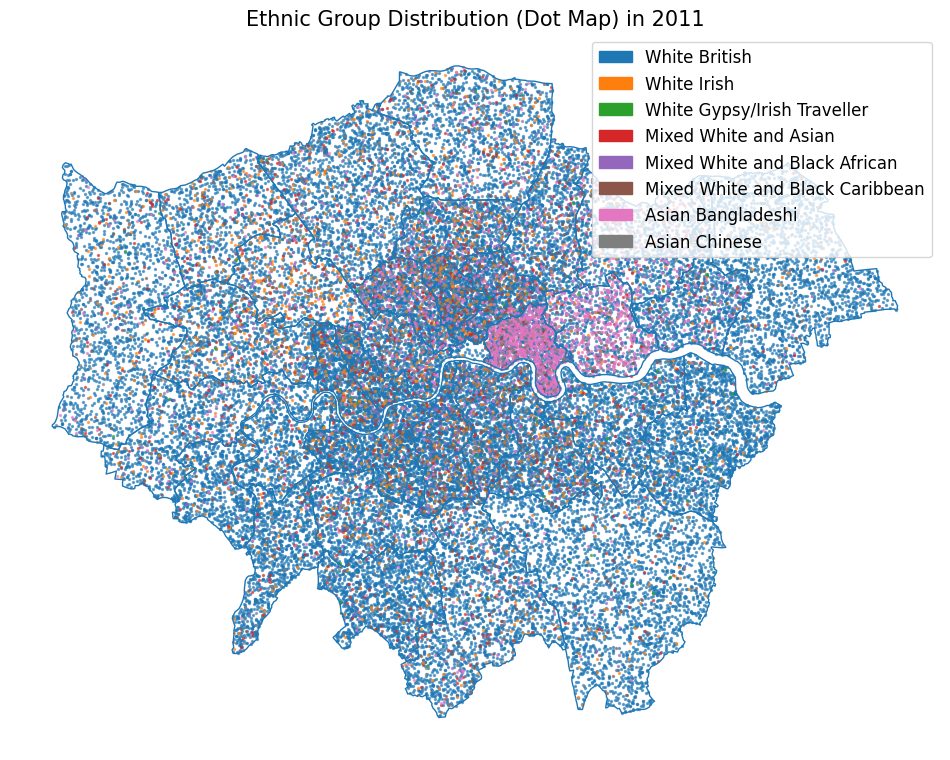

In [89]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point
import matplotlib.patches as mpatches  # For custom legend

# Load the census data
# Assuming 'grouped_data' is already available as the grouped census DataFrame
def random_point_in_polygon(polygon):
    """Generate a random point within a polygon"""
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        point = Point(x, y)
        if polygon.contains(point):
            return x, y


# Load the GeoJSON file
geo_df = gpd.read_file('london_421.geojson')
geo_df = geo_df.rename(columns={'name': 'local authority name'})  # Adjust if necessary
merged_data = geo_df.merge(grouped_data, on='local authority name', how='left')


# Define ethnic groups and their colors
ethnic_columns = grouped_data.columns[:-1]  # Excluding 'Total Population'
ethnic_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Sampling factor - Adjust this to control the density of dots
sampling_factor = 0.01  # For example, only plot 1% of the population

# Loop through each borough and generate points for each ethnic group
for borough, row in merged_data.iterrows():
    for ethnic_group, color in zip(ethnic_columns, ethnic_colors):
        population = row[ethnic_group]
        
        # Generate random points within the geometry of the borough, scaling population
        if population > 0:
            # Get the borough's polygon shape
            borough_geom = row['geometry']
            
            # Calculate the number of points to plot based on the population and sampling factor
            num_points = int(population * sampling_factor)  # Reduce number of points by sampling factor
            
            # Generate random points within the borough's boundary
            points = []
            for _ in range(num_points):
                x, y = random_point_in_polygon(borough_geom)
                points.append((x, y))
            
            # Convert points to a 2D numpy array (for scatter plotting)
            points = np.array(points)
            
            # Plot points only if there are any generated points
            if points.size > 0:
                ax.scatter(points[:, 0], points[:, 1], color=color, alpha=0.6, s=2)

# Plot the map
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title('Ethnic Group Distribution (Dot Map) in 2011', fontsize=15)
plt.axis('off')

# Create a custom legend
legend_labels = ethnic_columns  # Ethnic group names
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(ethnic_colors, legend_labels)]
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)

plt.show()

# Function to generate a random point within a polygon


#### Metrices

In [86]:
import numpy as np
import pandas as pd

# Assuming 'grouped_data' is your DataFrame with ethnic population data

# Step 1: Calculate the proportions of each ethnic group in each borough
ethnic_columns = grouped_data.columns[:-1]  # Exclude 'Total Population'
grouped_data_proportions = grouped_data[ethnic_columns].div(grouped_data['Total_Population'], axis=0)

# Initialize an empty dictionary to store the metrics
metrics = {}

# Step 2: Calculate Shannon Diversity Index (SDI)
def shannon_diversity(proportions):
    return -np.sum(proportions * np.log(proportions + 1e-9))  # Adding a small value to avoid log(0)

# Calculate SDI for each borough
metrics['Shannon Diversity Index'] = grouped_data_proportions.apply(shannon_diversity, axis=1)

# Step 3: Calculate Simpson's Diversity Index
def simpsons_diversity(proportions):
    return 1 - np.sum(proportions ** 2)

# Calculate Simpson's Diversity Index for each borough
metrics['Simpson Diversity Index'] = grouped_data_proportions.apply(simpsons_diversity, axis=1)

# Step 4: Calculate the Ethnic Fractionalization Index (EFI)
def ethnic_fractionalization(proportions):
    return 1 - np.sum(proportions ** 2)

# Calculate EFI for each borough
metrics['Ethnic Fractionalization Index'] = grouped_data_proportions.apply(ethnic_fractionalization, axis=1)

# Step 5: Calculate Evenness Index (H' / ln(S), where S is the number of ethnic groups)
def evenness_index(row):
    shannon = shannon_diversity(row)
    num_groups = len(row)
    return shannon / np.log(num_groups)

# Calculate Evenness Index for each borough
metrics['Evenness Index'] = grouped_data_proportions.apply(evenness_index, axis=1)

# Step 6: Calculate Population Proportions for each ethnic group in each borough
ethnic_proportions = grouped_data_proportions * 100  # Convert to percentage
metrics['Ethnic Proportions'] = ethnic_proportions

# Step 7: (Optional) Calculate Dissimilarity Index between two boroughs (e.g., between Borough 1 and Borough 2)
def dissimilarity_index(group1_proportions, group2_proportions, total_population_proportions):
    return 0.5 * np.sum(np.abs(group1_proportions - group2_proportions) / total_population_proportions)

# Example: Calculate dissimilarity index between first two boroughs
borough1 = grouped_data_proportions.iloc[0]
borough2 = grouped_data_proportions.iloc[1]
total_population_proportions = grouped_data_proportions.sum(axis=0)
metrics['Dissimilarity Index'] = dissimilarity_index(borough1, borough2, total_population_proportions)

                                                     
                                        

In [87]:
metrics

{'Shannon Diversity Index': local authority name
 Barking and Dagenham      1.170237
 Barnet                    1.125422
 Bexley                    0.828159
 Brent                     1.292460
 Bromley                   0.831623
 Camden                    1.153198
 City of London            1.002186
 Croydon                   1.203482
 Ealing                    1.225142
 Enfield                   1.163360
 Greenwich                 1.114232
 Hackney                   1.221963
 Hammersmith and Fulham    1.107558
 Haringey                  1.191095
 Harrow                    1.204559
 Havering                  0.740174
 Hillingdon                1.119915
 Hounslow                  1.186244
 Islington                 1.138837
 Kensington and Chelsea    1.043969
 Kingston upon Thames      0.959790
 Lambeth                   1.204357
 Lewisham                  1.197940
 Merton                    1.139791
 Newham                    1.373612
 Redbridge                 1.288556
 Richmond upon 

    Proportions: We calculate the proportions of each ethnic group relative to the total population in each borough.
    Shannon Diversity Index (SDI): We calculate the SDI by applying the formula across all boroughs.
    Simpson’s Diversity Index: Calculated using the formula, representing the probability that two individuals belong to the same ethnic group.
    Ethnic Fractionalization Index (EFI): Indicates how likely it is that two randomly chosen individuals belong to different ethnic groups.
    Evenness Index: Measures how evenly the ethnic groups are distributed across each borough.
    Ethnic Proportions: Simply represents the percentage of each ethnic group in each borough.
    Dissimilarity Index: Optional, compares the distribution of ethnic groups between two boroughs.

Additional Metrics for Spatial Analysis:

    Segregation Index: Measures how different groups are spatially segregated within London.
    Cluster Analysis (e.g., K-Means): To identify areas with high concentrations of particular ethnic groups.